# Tarefa 2 - CNN

## Modelo de CNN para Desenhos

## Prof. Hitoshi Nagano

Aluno: Glauco Azevedo

In [28]:
import time
import os, shutil
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from keras import models
from keras.layers import MaxPool2D, Convolution2D, Flatten, Dropout, Dense
from keras.optimizers import SGD, Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.applications import VGG16

In [2]:
pwd

u'/mnt/64229DE2229DBA0E/Dropbox/ITAU/Curso_Analytics/Mac_Learning/Aula 17'

## Leitura das imagens

In [8]:
train_dir = 'train'
validation_dir = 'validation'

validation_set_boas = 'validation/Imagens boas/'
validation_set_ruins = 'validation/Imagens ruins/'

test_set = 'test_sem_label/'

In [44]:
train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

val_generator = val_gen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 187 images belonging to 2 classes.
Found 63 images belonging to 2 classes.


Escolhendo um modelo pré-treinado

In [53]:
conv_vgg16 = VGG16(weights='imagenet', include_top=False, 
              input_shape=(150, 150, 3))

## Customizando para fazer um fine-tuning

In [99]:
model = models.Sequential([
    conv_vgg16,
    Flatten(),
    Dropout(.5),
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(1, activation='sigmoid')    
])

In [100]:
conv_vgg16.trainable = False

In [101]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 513       
Total params: 18,910,017
Trainable params: 4,195,329
Non-trainable params: 14,714,688
________________________________________________________

Com o RMSprop

In [102]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

Com o SGD (sem nesterov)

In [108]:
model.compile(loss='binary_crossentropy',
              optimizer=SGD(lr=1e-4),
              metrics=['acc'])

Usando RMSprop

In [103]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100,
                              epochs=10, 
                              validation_data=val_generator,
                              validation_steps=10)

Epoch 1/10
100/100 [==============================] - 6s 58ms/step - loss: 0.3330 - acc: 0.8559 - val_loss: 0.3471 - val_acc: 0.8735
Epoch 2/10
100/100 [==============================] - 5s 51ms/step - loss: 0.1588 - acc: 0.9359 - val_loss: 0.2950 - val_acc: 0.8725
Epoch 3/10
100/100 [==============================] - 5s 51ms/step - loss: 0.0876 - acc: 0.9656 - val_loss: 0.3306 - val_acc: 0.8855
Epoch 4/10
100/100 [==============================] - 5s 51ms/step - loss: 0.0617 - acc: 0.9796 - val_loss: 0.3190 - val_acc: 0.8926
Epoch 5/10
100/100 [==============================] - 5s 52ms/step - loss: 0.0263 - acc: 0.9930 - val_loss: 0.4217 - val_acc: 0.8795
Epoch 6/10
100/100 [==============================] - 5s 51ms/step - loss: 0.0209 - acc: 0.9935 - val_loss: 0.6045 - val_acc: 0.8792
Epoch 7/10
100/100 [==============================] - 5s 52ms/step - loss: 0.0137 - acc: 0.9956 - val_loss: 0.4089 - val_acc: 0.8916
Epoch 8/10
100/100 [==============================] - 5s 51ms/step - 

Usando SGD, com parâmetros default

In [109]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100,
                              epochs=10, 
                              validation_data=val_generator,
                              validation_steps=10)

Epoch 1/10
100/100 [==============================] - 6s 56ms/step - loss: 0.0099 - acc: 0.9975 - val_loss: 0.7967 - val_acc: 0.8859
Epoch 2/10
100/100 [==============================] - 5s 50ms/step - loss: 0.0110 - acc: 0.9956 - val_loss: 0.8945 - val_acc: 0.8614
Epoch 3/10
100/100 [==============================] - 5s 50ms/step - loss: 0.0114 - acc: 0.9965 - val_loss: 0.6914 - val_acc: 0.8859
Epoch 4/10
100/100 [==============================] - 5s 50ms/step - loss: 0.0088 - acc: 0.9965 - val_loss: 0.8610 - val_acc: 0.8614
Epoch 5/10
100/100 [==============================] - 5s 50ms/step - loss: 0.0129 - acc: 0.9956 - val_loss: 0.6725 - val_acc: 0.8792
Epoch 6/10
100/100 [==============================] - 5s 51ms/step - loss: 0.0054 - acc: 0.9980 - val_loss: 0.7733 - val_acc: 0.8735
Epoch 7/10
100/100 [==============================] - 5s 50ms/step - loss: 0.0061 - acc: 0.9985 - val_loss: 0.6682 - val_acc: 0.8725
Epoch 8/10
100/100 [==============================] - 5s 51ms/step - 

In [110]:
time_format = '%Y-%m-%d %H:%M:%S'
hora_exec = time.strftime(time_format)

In [111]:
model.save('models/cnn_vgg16_top_trained_v3_sgd_'+hora_exec+'.h5')

In [112]:
ls -l models/

total 270940
-rwxrwxrwx 1 root root 92478200 Oct 22 18:08 cnn_vgg16_top_trained_2018-10-22 18:08:07.h5*
-rwxrwxrwx 1 root root 92479264 Oct 22 18:41 cnn_vgg16_top_trained_v2_2018-10-22 18:41:22.h5*
-rwxrwxrwx 1 root root 92480576 Oct 22 19:24 cnn_vgg16_top_trained_v3_sgd_2018-10-22 19:23:56.h5*


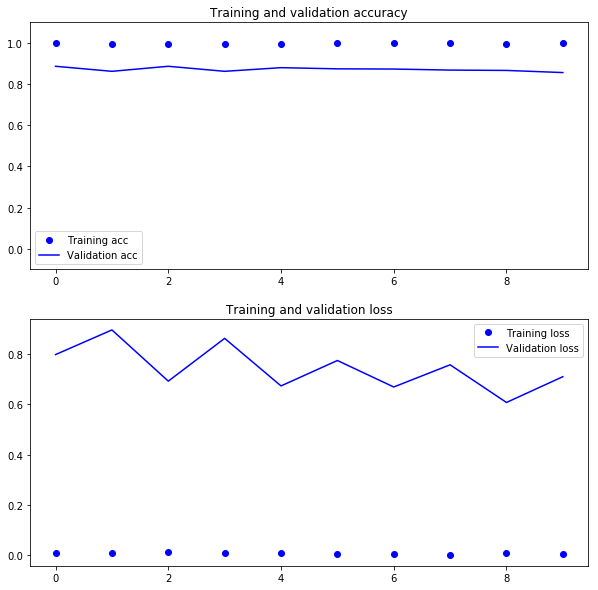

In [113]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, ax = plt.subplots(2,1, figsize=(10,10))

ax[0].plot(epochs, acc, 'bo', label='Training acc')
ax[0].plot(epochs, val_acc, 'b', label='Validation acc')
ax[0].set_title('Training and validation accuracy')
ax[0].set_ylim(-0.1,1.1)
ax[0].legend()

ax[1].plot(epochs, loss, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation loss')
ax[1].set_title('Training and validation loss')
ax[1].legend()

plt.savefig('train_val_acc_loss_'+hora_exec+'.pdf')
plt.show()

Essa abordagem acima, não surtiu muito efeito, com erro de validação muito alto, e acurácia não muito elevada. O modelo parece estar sofrendo de overfitting, devivo a complexidade da VGG sobre o imagenet.

## Tentativa 2 - Fine Tuning + Data Augmentation

Nessa tentativa, será abordada a técnica de fine tuning da VGG16, de modo a realizar o treino sobre uma série de dados aumentados, para tentar ennriquecer o modelo. 

Além disso, será feita uma transformação de features, a partir das imagens originais, de modo a se pegar **APENAS** as bordas.

### Feature Transform

In [153]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    vertical_flip=True,
    horizontal_flip=True,
)


val_gen = ImageDataGenerator(
    rescale=1./255,
    vertical_flip=True,
    horizontal_flip=True,
)

In [154]:
train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

val_generator = val_gen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 187 images belonging to 2 classes.
Found 63 images belonging to 2 classes.


(array([  25.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  162.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

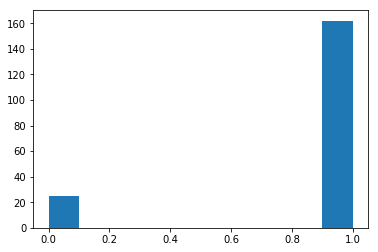

In [196]:
plt.hist(train_generator.classes)

In [161]:
conv_vgg16 = VGG16(weights='imagenet', include_top=False, 
              input_shape=(150, 150, 3))

In [187]:
model2 = models.Sequential([
    conv_vgg16,
    Flatten(),
    Dropout(.2),
    Dense(64, activation='relu'),
    Dropout(.2),
    Dense(1, activation='sigmoid')
])

In [188]:
conv_vgg16.trainable = False

In [189]:
conv_vgg16.trainable = True

set_trainable = False
for layer in conv_vgg16.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [190]:
model2.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-5),
              metrics=['acc'])

In [191]:
history = model2.fit_generator(train_generator,
                                steps_per_epoch=50,
                                epochs=10,
                                validation_data=val_generator,
                                validation_steps=30)

Epoch 1/10
50/50 [==============================] - 5s 103ms/step - loss: 0.4066 - acc: 0.8539 - val_loss: 0.3602 - val_acc: 0.8599
Epoch 2/10
50/50 [==============================] - 4s 81ms/step - loss: 0.3061 - acc: 0.8739 - val_loss: 0.3353 - val_acc: 0.8565
Epoch 3/10
50/50 [==============================] - 4s 80ms/step - loss: 0.2415 - acc: 0.8839 - val_loss: 0.2793 - val_acc: 0.8664
Epoch 4/10
50/50 [==============================] - 4s 81ms/step - loss: 0.1671 - acc: 0.9341 - val_loss: 0.2372 - val_acc: 0.8898
Epoch 5/10
50/50 [==============================] - 4s 80ms/step - loss: 0.1208 - acc: 0.9641 - val_loss: 0.2356 - val_acc: 0.8966
Epoch 6/10
50/50 [==============================] - 4s 81ms/step - loss: 0.0775 - acc: 0.9810 - val_loss: 0.2547 - val_acc: 0.8857
Epoch 7/10
50/50 [==============================] - 4s 80ms/step - loss: 0.0614 - acc: 0.9852 - val_loss: 0.2693 - val_acc: 0.8901
Epoch 8/10
50/50 [==============================] - 4s 81ms/step - loss: 0.0430 - 

In [192]:
time_format = '%Y-%m-%d %H:%M:%S'
hora_exec = time.strftime(time_format)

In [208]:
model.save('models/cnn_vgg16_top_trained_v4_rmsprop_'+hora_exec+'.h5')

In [209]:
ls -l models/

total 541888
-rwxrwxrwx 1 root root 92478200 Oct 22 18:08 cnn_vgg16_top_trained_2018-10-22 18:08:07.h5*
-rwxrwxrwx 1 root root 92479264 Oct 22 18:41 cnn_vgg16_top_trained_v2_2018-10-22 18:41:22.h5*
-rwxrwxrwx 1 root root 92480576 Oct 22 19:24 cnn_vgg16_top_trained_v3_sgd_2018-10-22 19:23:56.h5*
-rwxrwxrwx 1 root root 92480080 Oct 22 20:37 cnn_vgg16_top_trained_v4_rmsprop_2018-10-22 20:37:32.h5*
-rwxrwxrwx 1 root root 92480080 Oct 22 20:39 cnn_vgg16_top_trained_v4_rmsprop_2018-10-22 20:39:17.h5*
-rwxrwxrwx 1 root root 92480080 Oct 23 09:05 cnn_vgg16_top_trained_v4_rmsprop_2018-10-22 23:53:49.h5*


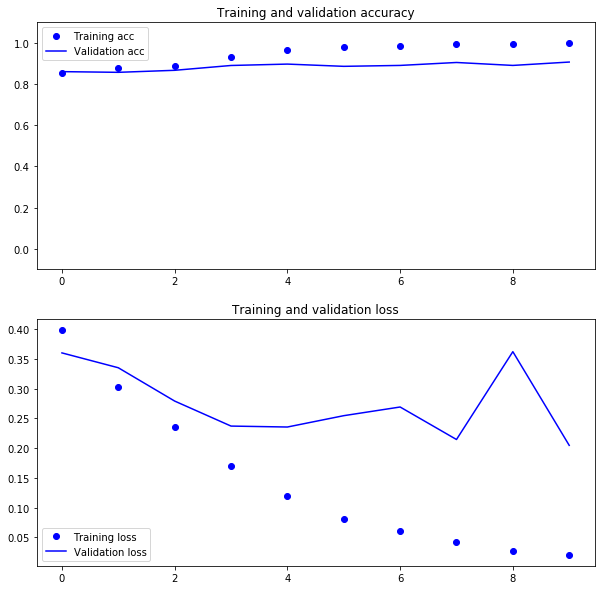

In [194]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, ax = plt.subplots(2,1, figsize=(10,10))

ax[0].plot(epochs, acc, 'bo', label='Training acc')
ax[0].plot(epochs, val_acc, 'b', label='Validation acc')
ax[0].set_title('Training and validation accuracy')
ax[0].set_ylim(-0.1,1.1)
ax[0].legend()

ax[1].plot(epochs, loss, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation loss')
ax[1].set_title('Training and validation loss')
ax[1].legend()

plt.savefig('train_val_acc_loss_'+hora_exec+'.pdf')
plt.show()

Pelo visto, apenas com transfer learning e uma breve data augmentation não esteja bastando. vamos tentar com um pequeno feature transform

In [203]:
len(os.listdir('test_sem_label/'))

64

In [207]:
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 1))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = model2.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels


# train_features, train_labels = extract_features(train_dir, 2000)
# validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_set, len(os.listdir(test_set)))

Found 0 images belonging to 0 classes.


ZeroDivisionError: integer division or modulo by zero